In [307]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [308]:
class GaussianKernel():
    """
    The Gaussian kernel is defined as $k(x,y) = \exp(-\gamma||x-y||^2)$.
    """
    def __init__(self, gamma):
        self.gamma = gamma
    
    def forward(self, x, y):
        return np.exp(- self.gamma * (np.abs(x - y) ** 2))

In [309]:
N = 100 # sample number

In [310]:
# generate sample data.
X = np.linspace(0, 10, N)
y = 3*np.sin(X) + 2*np.cos(2*X) + 5*np.sin(2/5*X) + np.random.randn(len(X)) * 0.1

In [311]:
missing_value_rate = 0.1
sample_index = np.sort(np.random.choice(np.arange(N), int(N * missing_value_rate), replace=False))

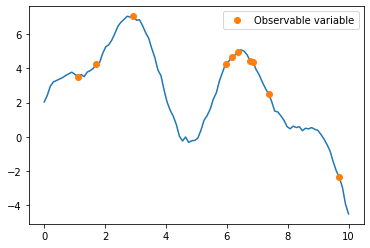

In [312]:
plt.plot(X, y)
plt.plot(X[sample_index], y[sample_index], 'o', label='Observable variable')
plt.legend()

In [313]:
# initialize mean
mu_init = np.array([0] * N)

In [314]:
gauss_kernel = GaussianKernel(1)
train_kernel = np.array([[gauss_kernel.forward(x, x_prime) for x in X[sample_index]] for x_prime in X[sample_index]]) 

In [315]:
mu_post = np.zeros(N)
cov_post = np.zeros((N, N))

In [316]:
var = 0.1 ** 2

In [317]:
# Calculate the mean and covariance functions of the posterior distribution.
for i in range(N):
    kn_x =  np.array([gauss_kernel.forward(x, X[i]) for x in X[sample_index]])
    mu_post[i] = mu_init[i] + kn_x.T @ np.linalg.inv(train_kernel + var * np.identity(train_kernel.shape[0])) @ (y[sample_index] - mu_init[sample_index])
    for j in range(N):
        cov_post[i][j] = gauss_kernel.forward(X[i], X[j]) -  kn_x.T @ np.linalg.inv(train_kernel + var * np.identity(train_kernel.shape[0])) @ np.array([gauss_kernel.forward(x, X[j]) for x in X[sample_index]]) 

In [318]:
std_post = np.sqrt([cov_post[i][i] if i in sample_index else (cov_post[i][i] + var) for i in range(N)])

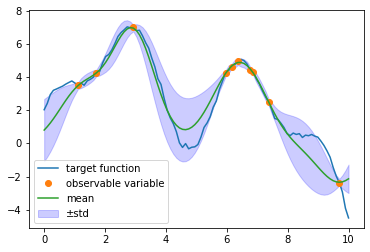

In [326]:
plt.plot(X, y, label='target function')
plt.plot(X[sample_index], y[sample_index], 'o',  label='observable variable')
plt.plot(X, mu_post, label='mean')
plt.fill_between(X, mu_post + 2*std_post, mu_post - 2*std_post, alpha=.2, color='blue', label= '±std')
plt.legend()